In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [52]:
path = r'C:\Users\nicol\OneDrive\Documents\Thesis\Presentations'

In [53]:
data = pd.read_excel(path +'\\Gene_HeatMap_no_nrfA.xlsx')

In [54]:
data

,Process,Gene,Whole Metagenome,Gallionellaceae sp.,Noviherbaspirillum sp.,Rhodoblastus sp.,Rhodoferax sp.,Ramlibacter sp.,Geothrix sp.,Thiobacillus sp.,Betaproteobacteria bacterium
0,Fe Oxidation,cyc2,0,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
1,NaN,mtoAB,0,0.00,0.90,0.00,0.00,0.00,0.00,0.00,0.00
2,Denitrification,narKGHI,0,0.00,0.77,0.77,0.77,0.77,0.00,0.77,0.00
3,NaN,nirK,0,0.00,0.71,0.71,0.00,0.71,0.00,0.71,0.71
4,NaN,nirS,0,0.68,0.68,0.68,0.68,0.00,0.00,0.00,0.68
5,NaN,norBC,0,0.65,0.65,0.65,0.65,0.65,0.65,0.65,0.00
6,NaN,nosZ,0,0.00,0.62,0.62,0.62,0.62,0.00,0.62,0.00
7,Carbon Fixation,rbcL,0,0.59,0.59,0.59,0.00,0.59,0.00,0.59,0.59
8,NaN,rbcS,0,0.00,0.50,0.50,0.00,0.50,0.00,0.50,0.50
9,Oxygen Tolerance,ccoPONQ,0,0.45,0.45,0.45,0.45,0.45,0.00,0.45,0.45


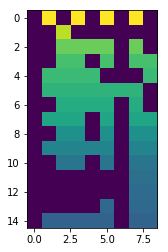

In [55]:
plt.imshow(data[data.columns[2:]])

In [56]:
data.columns

Index(['Process', 'Gene', 'Whole Metagenome', 'Gallionellaceae sp.',
       'Noviherbaspirillum sp. ', 'Rhodoblastus sp. ', 'Rhodoferax sp. ',
       'Ramlibacter sp. ', 'Geothrix sp.', 'Thiobacillus sp. ',
       'Betaproteobacteria bacterium'],
      dtype='object')

In [57]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", swap_axes = 0, **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        plt.figure(dpi = 300)
        ax = plt.gca()

    # Plot the heatmap
    if swap_axes:
        #default set to zero. to transpose this flag must be 1
        pltdata = data.T
    else:
        pltdata = data
    im = ax.imshow(pltdata, **kwargs)

    # Create colorbar
    #cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    #cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    
    # We want to show all ticks...
    ax.set_xticks(np.arange(pltdata.shape[1]))
    ax.set_yticks(np.arange(pltdata.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels, style = 'italic')

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=50, ha="left",
             rotation_mode="anchor", fontstyle = 'italic')

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(pltdata.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(pltdata.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    
    plt.savefig('Thesis_Gene_HeatMap_horizontal', dpi = 300, bbox_inches = 'tight')
    
    return im, #cbar

(<matplotlib.image.AxesImage at 0x17e6e93a5f8>,)

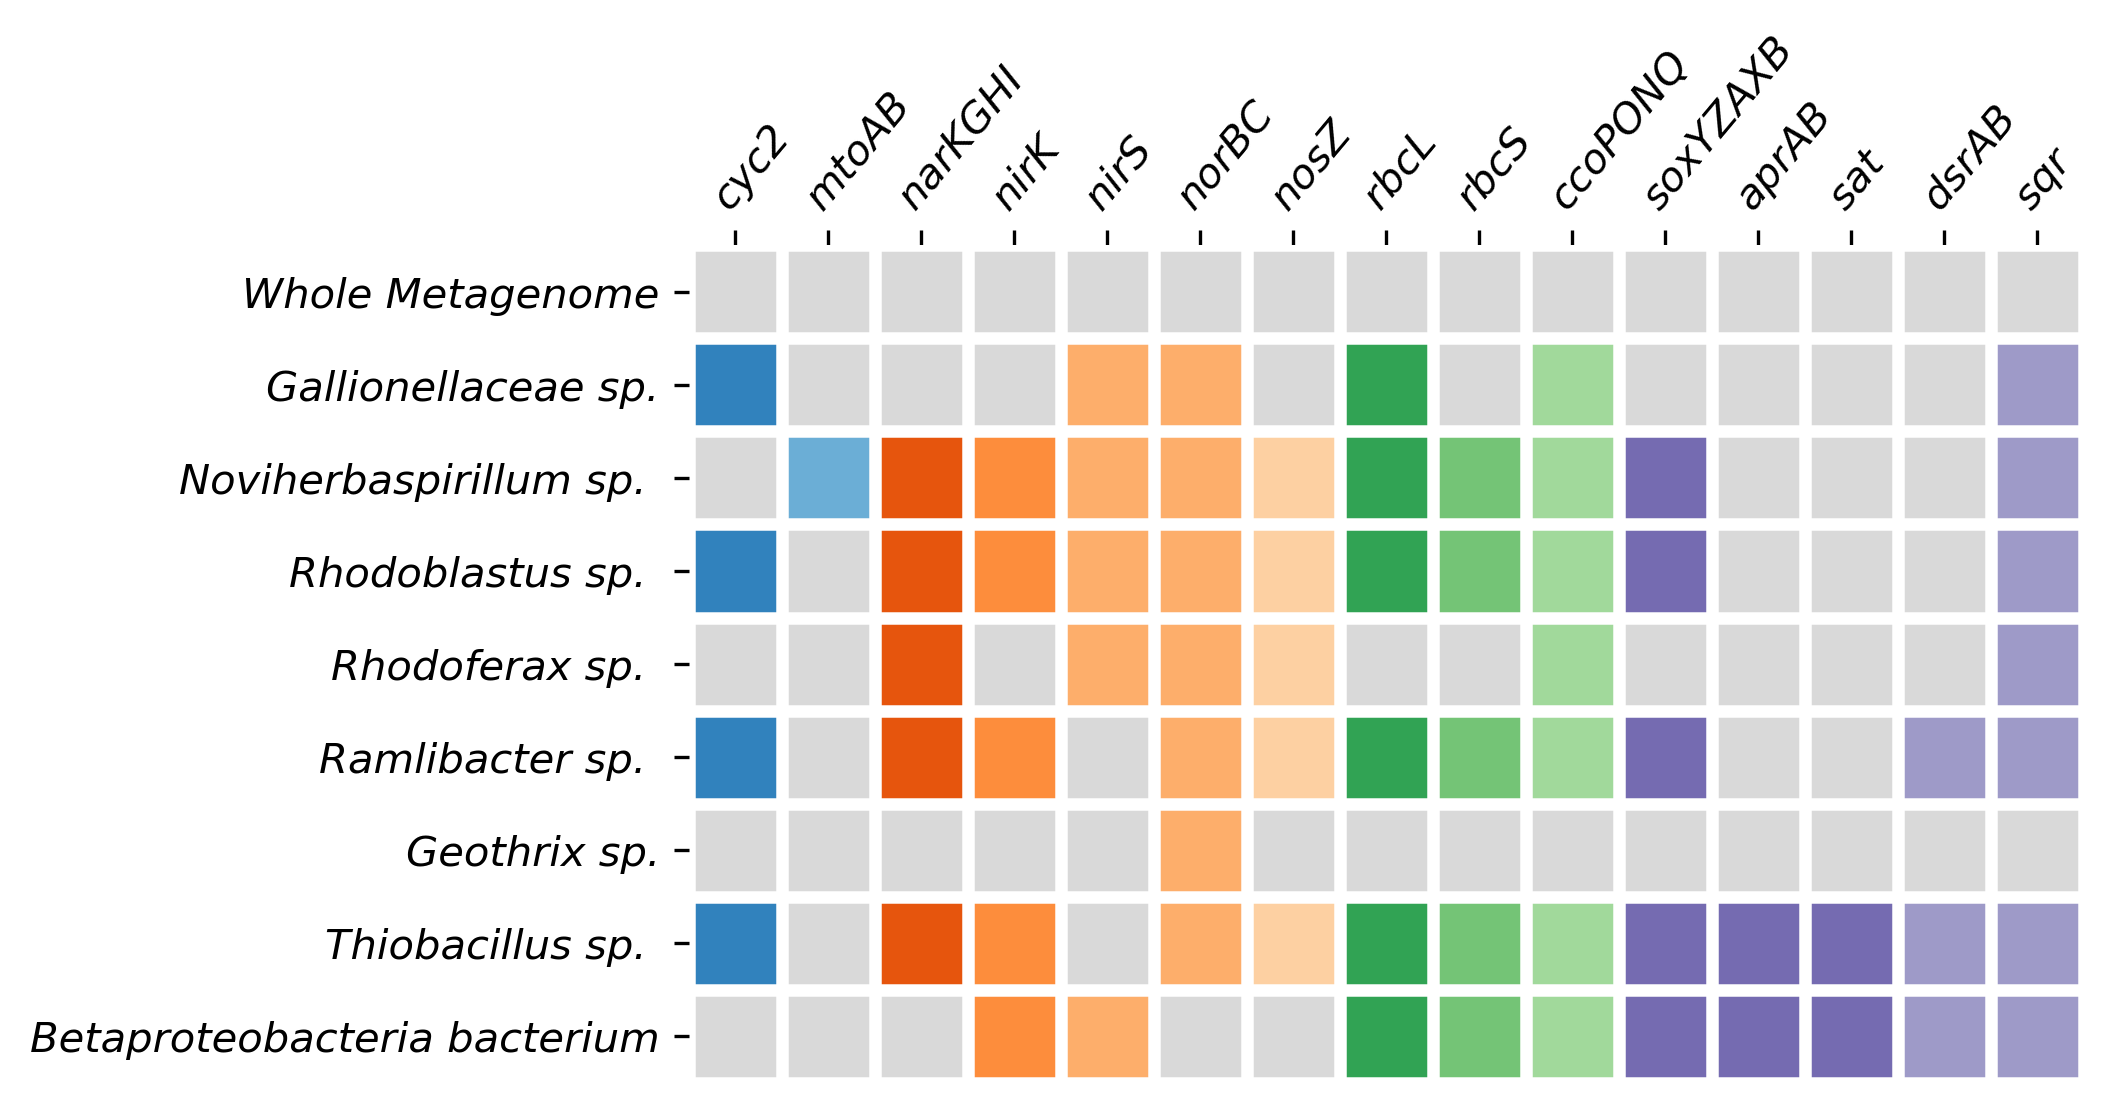

In [58]:
swap_axes = 1
if swap_axes:
    row_names = data.columns[2:]
    columns_names = data['Gene']
else:
    row_names = data['Gene']
    columns_names = data.columns[2:]

heatmap(data[data.columns[2:]], row_labels =row_names , col_labels = columns_names, swap_axes = swap_axes, cmap = 'tab20c_r')

In [1]:
%matplotlib inline